# Udacity Deep Reinforcement Learning course - Project 2: Continuous Control - Report 

In [1]:
from unityagents import UnityEnvironment
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import pickle


## Learning Algorithm

The implemented algorithm was Deep Deterministic Policy Gradients (DDPG). 
The general flow of the algorithm is as follows:

1. Initialize the environment
2. Agent selects an action based on the current state
3. The Agent executes the action. The actor network selects (deterministic) an action and some noise is added for exploration
4. The environment receives the action and updates it's state
5. The agent stores receives the outcome of its action and stores the new experience
6. If the appropriate conditions are met the agent learns based on past experiences.
        a. Get next actions based on the target actor network
        b. Get the predicted next-state Q-Values from the target critic network
        c. Compute Q targets for current states
        d. Update local actor and critic networks
        e. Soft-update target networks
7. The loop repeats

The hyper-parameters used are similar to the ones used in the course.

* buffer_size = 1e5,
* batch_size = 128,
* gamma = 0.99,
* tau = 1e-3,
* lr_actor = 1e-3,
* lr_critic = 1e-3,
* noise_decay = 0.999,
* update_every = 4,
* n_episodes = 50, 
* max_t = 1000,
* OUNoise:
    * mu=0,
    * theta=0.15,
    * sigma=0.2
    
### Model

The model used for the Actor network is a 3 layer fully connected neural network with 400, 300, 1 nodes respectively. `gelu` activation functions are used except for the output layer where we use `tanh`.

The model used for the Critic is a 4 layer fully connected neural network with 128, 256+action_size, 128, 1 nodes respectively. We use `gelu` as the activation function for all layers except the output layer which has no activation function. Note that the first layer uses the state as input and the second concatenates the outputs of the first layer with the embedding of an action.


## Training

The environment was solved in the first 100 episodes

```
Episode 10	Average Score: 3.20
Episode 20	Average Score: 18.35
Episode 30	Average Score: 25.13
Episode 40	Average Score: 28.15
Episode 50	Average Score: 30.23
Episode 60	Average Score: 31.62
Episode 70	Average Score: 32.64
Episode 80	Average Score: 33.33
Episode 90	Average Score: 33.86
Environment solved in 0 episodes!	Average Score: 34.32
Episode 100	Average Score: 34.32
```

In [20]:
with open('scores.pkl', 'rb') as f:
    scores = pickle.load(f)

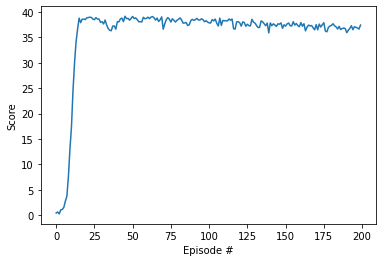

In [23]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), np.mean(scores, axis=1))
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Example Run

In [4]:
env = UnityEnvironment(file_name='Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [6]:
# Value for random seed
seed = 42

In [7]:
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents
num_agents = len(env_info.agents)
# size of each action
action_size = brain.vector_action_space_size
# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]

In [8]:
from agent import Agent

agent = Agent(state_size, action_size, seed, model_state_dict_path="./")

Loading actor from: ./checkpoint_actor.pth
Loading critic from: ./checkpoint_critic.pth


In [9]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states) # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 38.975999128818515


In [10]:
env.close()

## Future Work

* Compare to other algorithms (e.g. DQN)
* Explore more NN architectures
* Hyperparameter optimization with experiment tracking